In [1]:
#reload library if modified
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, 'E:/mylib')

In [3]:
from MSQC import external as qc
qc.__msms_columns

['Charge',
 'Ion injection time',
 'Retention time',
 'Raw file',
 'Identified',
 'Total ion current',
 'Sequence']

In [4]:
import os
RAW_FILE_PATH =os.path.join('E:', os.sep, 'lucia_tmt6', 'raw')
TXT_PATH=os.path.join(RAW_FILE_PATH,'combined','txt')

In [5]:
#temp = pd.read_csv(os.path.join(TXT_PATH,'msms.txt'),sep='\t',nrows=10)
#list(temp.columns)
#temp[['Raw file','Retention time','Mass Deviations [ppm]']].head()


In [6]:
temp[['Raw file','Retention time','Mass Deviations [ppm]']].head()

NameError: name 'temp' is not defined

In [10]:
df_summary, msScans, msmsIdentified, msmsScans, msmsmsScans, msms= qc.qc_pipline(TXT_PATH,parse_msms=False) 

summary shape: (21, 52)
parse msmsScans
546774 lines in E:\lucia_tmt6\raw\combined\txt\msmsScans.txt
2 expected chunks of  273387.0 rows
find_chunks ran in 0.72s



(546773, 7)
parse msmsIdentified


D:\michele\miniconda3\envs\prediction\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\michele\miniconda3\envs\prediction\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


parse msScans
125912 lines in E:\lucia_tmt6\raw\combined\txt\msScans.txt
1 expected chunks of  125912.0 rows
find_chunks ran in 0.08s



(125911, 5)


D:\michele\miniconda3\envs\prediction\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\michele\miniconda3\envs\prediction\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
msms.columns

Index([], dtype='object')

In [9]:
raw_list = os.listdir(RAW_FILE_PATH)
raw_list = [n for n in raw_list if n.endswith('.raw')]
raw_list

['LG-148-2020-TMT6plex-Fr1.raw',
 'LG-148-2020-TMT6plex-Fr10.raw',
 'LG-148-2020-TMT6plex-Fr11.raw',
 'LG-148-2020-TMT6plex-Fr12.raw',
 'LG-148-2020-TMT6plex-Fr13.raw',
 'LG-148-2020-TMT6plex-Fr14.raw',
 'LG-148-2020-TMT6plex-Fr15.raw',
 'LG-148-2020-TMT6plex-Fr16.raw',
 'LG-148-2020-TMT6plex-Fr17.raw',
 'LG-148-2020-TMT6plex-Fr18.raw',
 'LG-148-2020-TMT6plex-Fr19.raw',
 'LG-148-2020-TMT6plex-Fr2.raw',
 'LG-148-2020-TMT6plex-Fr20.raw',
 'LG-148-2020-TMT6plex-Fr3.raw',
 'LG-148-2020-TMT6plex-Fr4.raw',
 'LG-148-2020-TMT6plex-Fr5.raw',
 'LG-148-2020-TMT6plex-Fr6.raw',
 'LG-148-2020-TMT6plex-Fr7.raw',
 'LG-148-2020-TMT6plex-Fr8.raw',
 'LG-148-2020-TMT6plex-Fr9.raw']

In [21]:
tempMSMSdf['Ion injection time'].value_counts()

Series([], Name: Ion injection time, dtype: int64)

LG-148-2020-TMT6plex-Fr1.raw


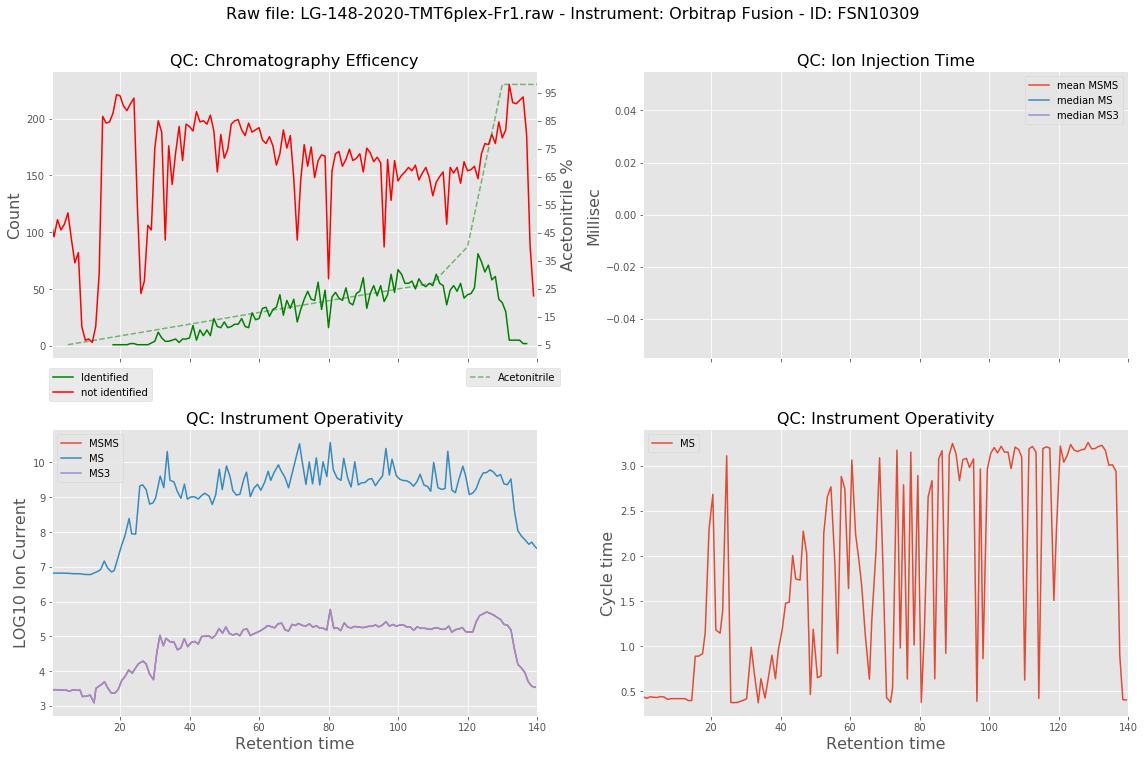

LG-148-2020-TMT6plex-Fr10.raw


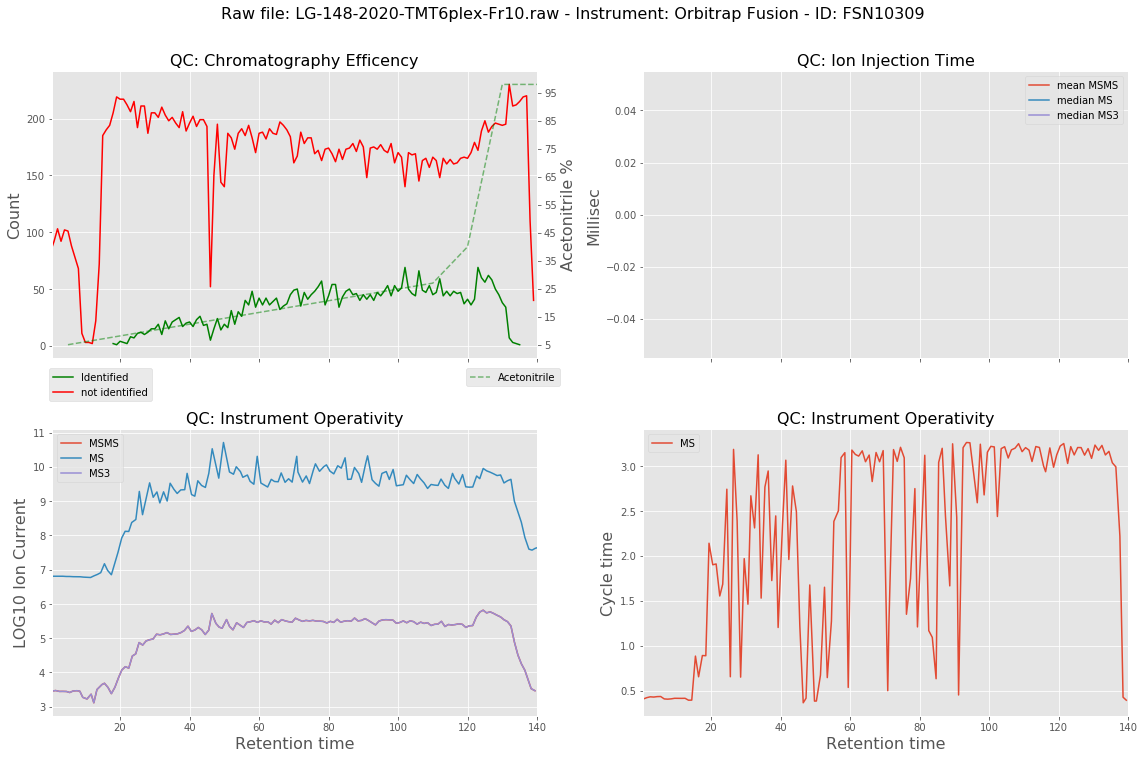

LG-148-2020-TMT6plex-Fr11.raw


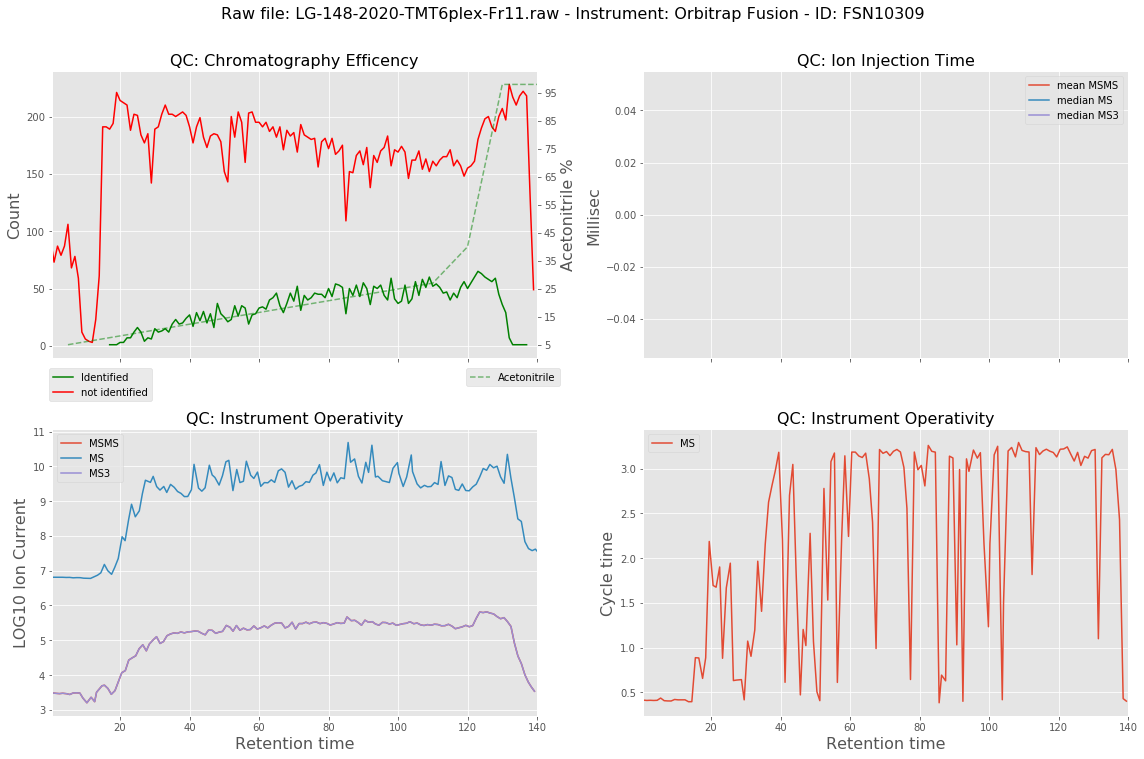

LG-148-2020-TMT6plex-Fr12.raw


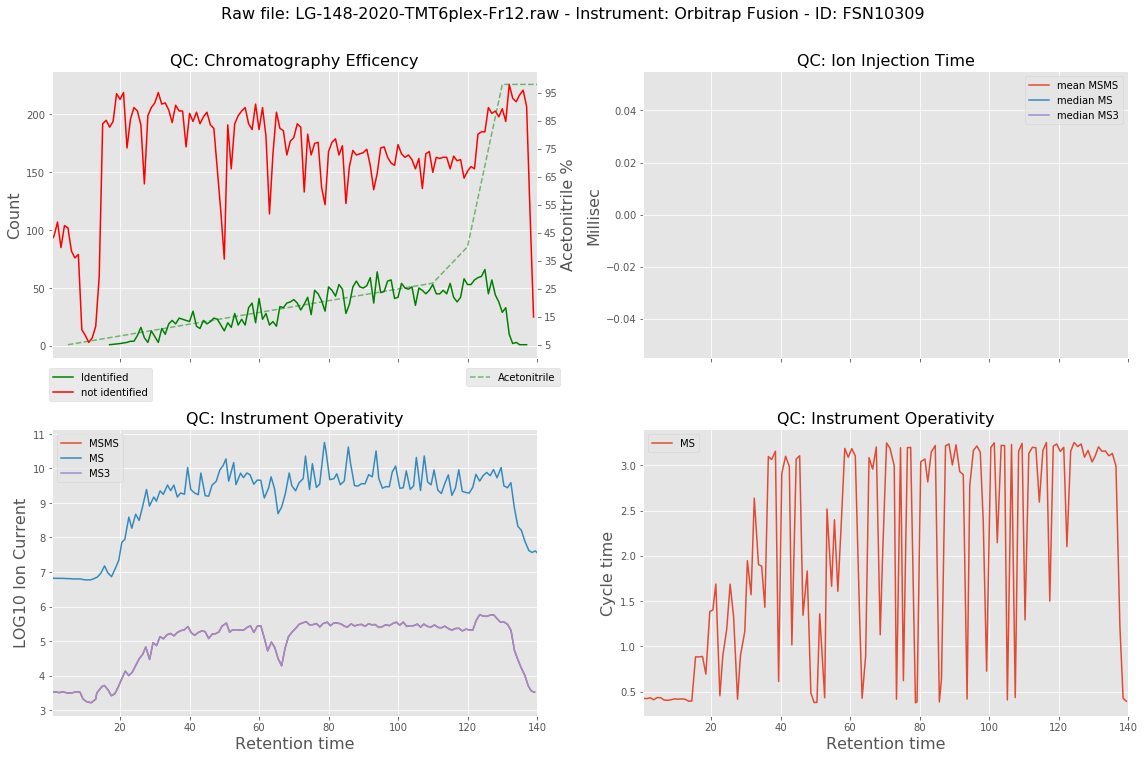

LG-148-2020-TMT6plex-Fr13.raw


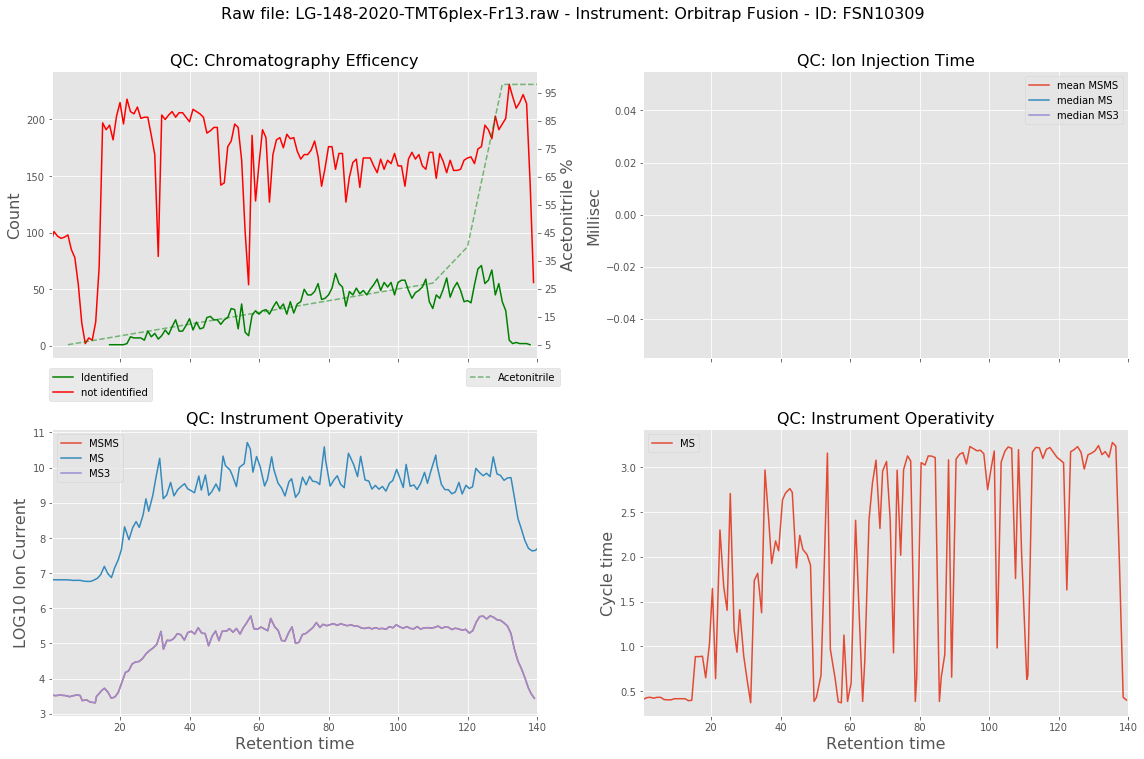

LG-148-2020-TMT6plex-Fr14.raw


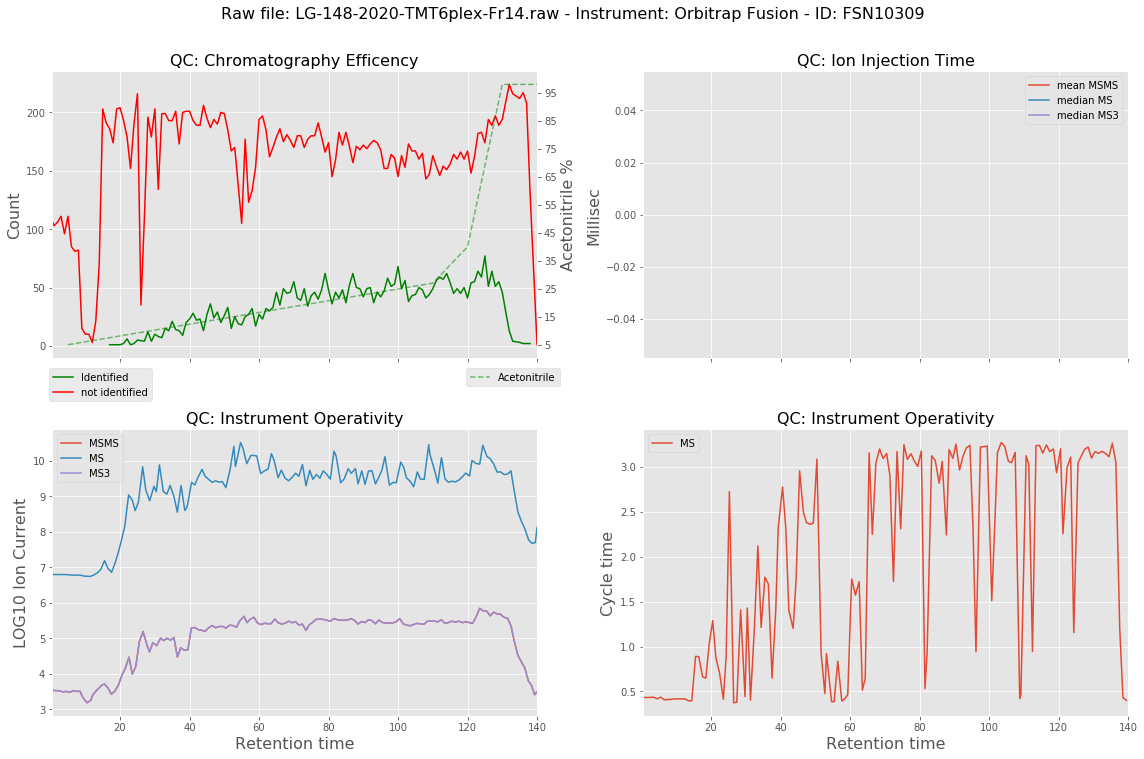

LG-148-2020-TMT6plex-Fr15.raw


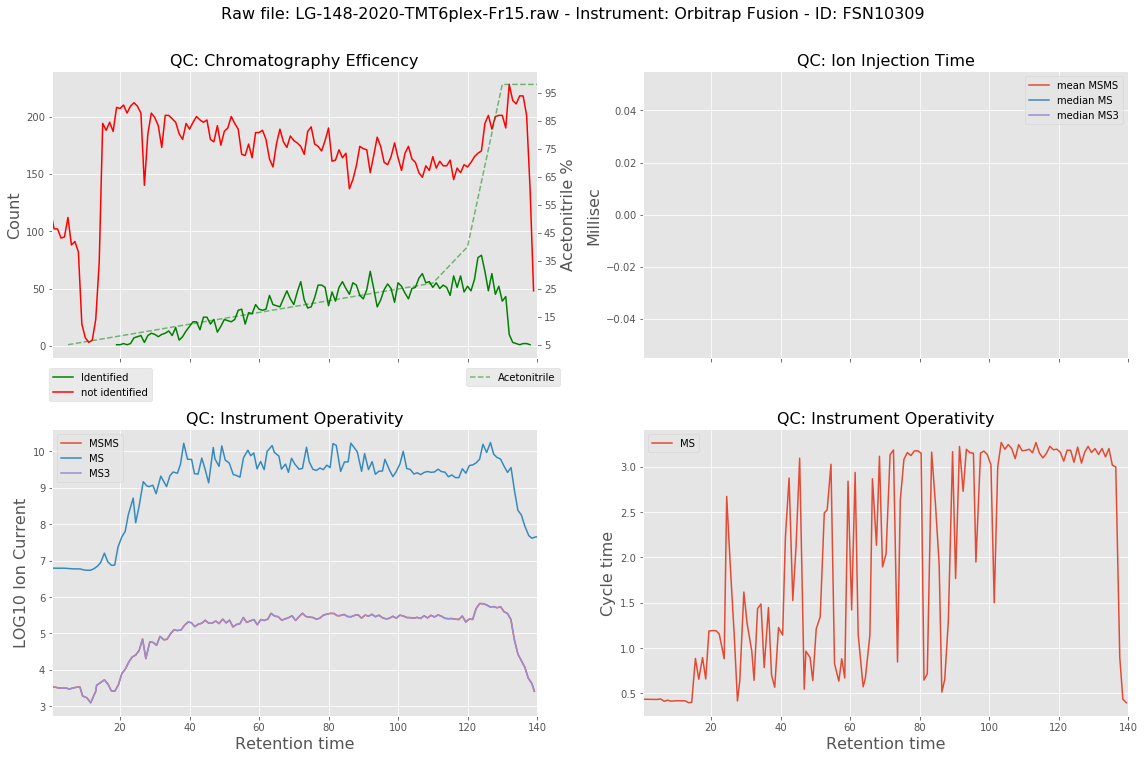

LG-148-2020-TMT6plex-Fr16.raw


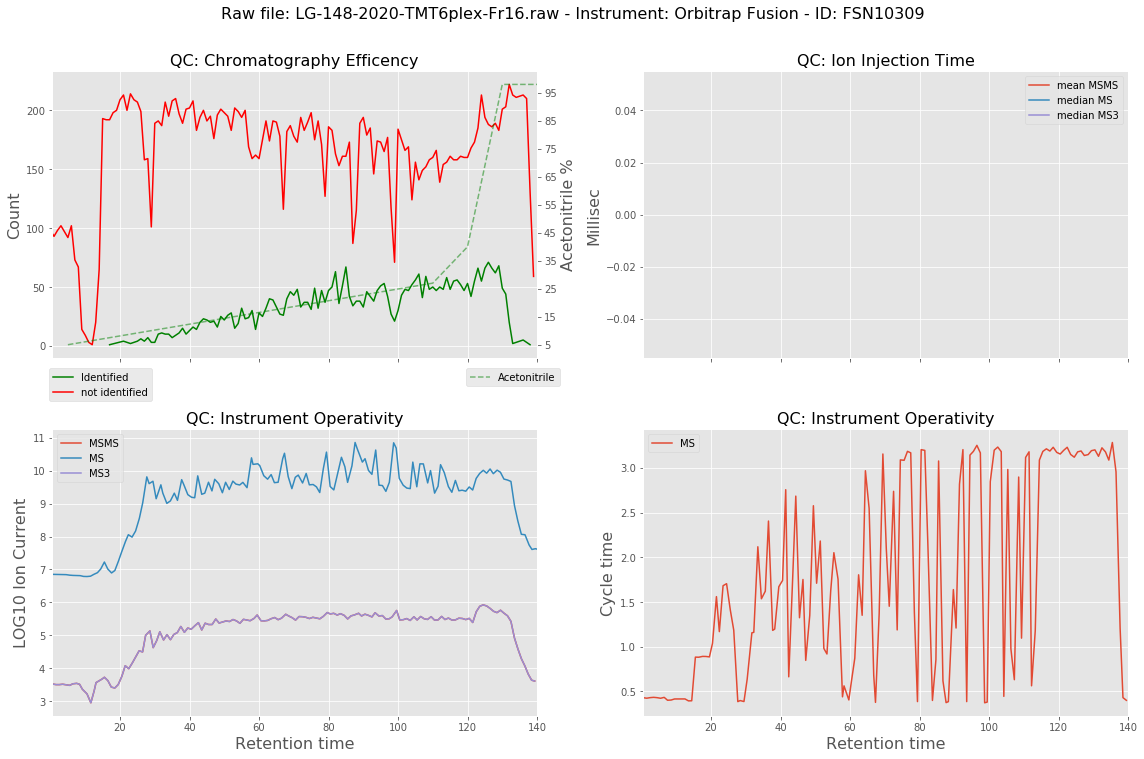

LG-148-2020-TMT6plex-Fr17.raw


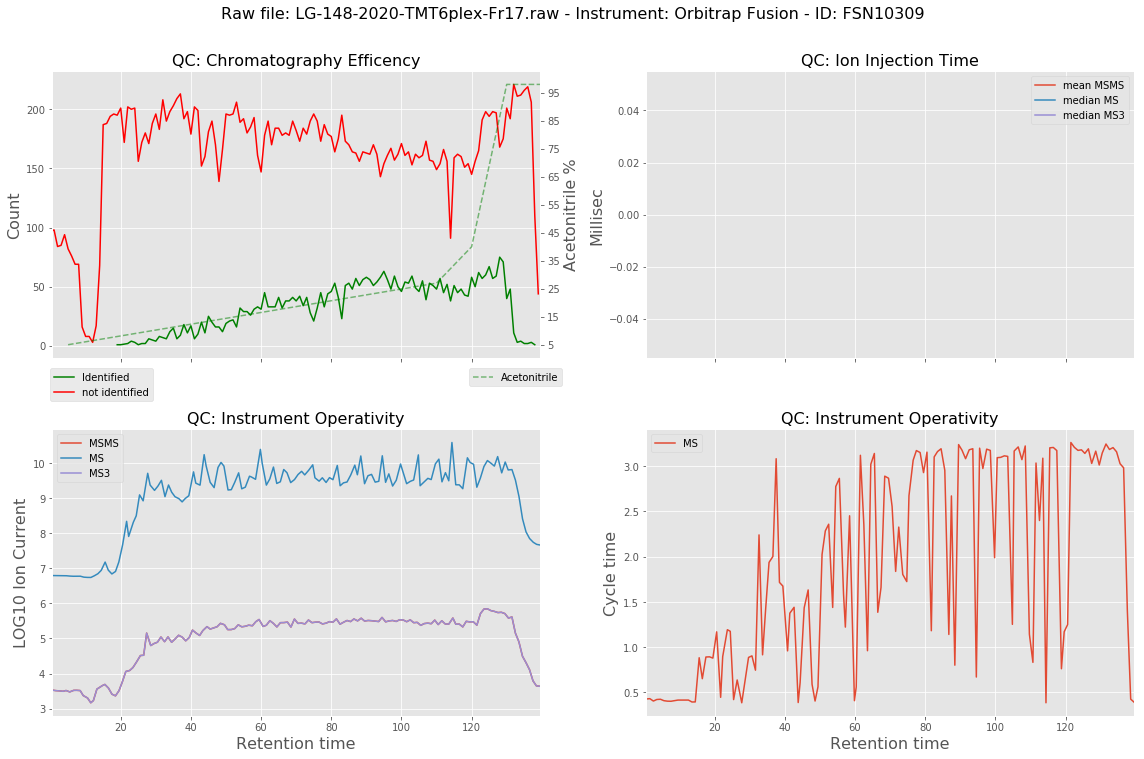

LG-148-2020-TMT6plex-Fr18.raw


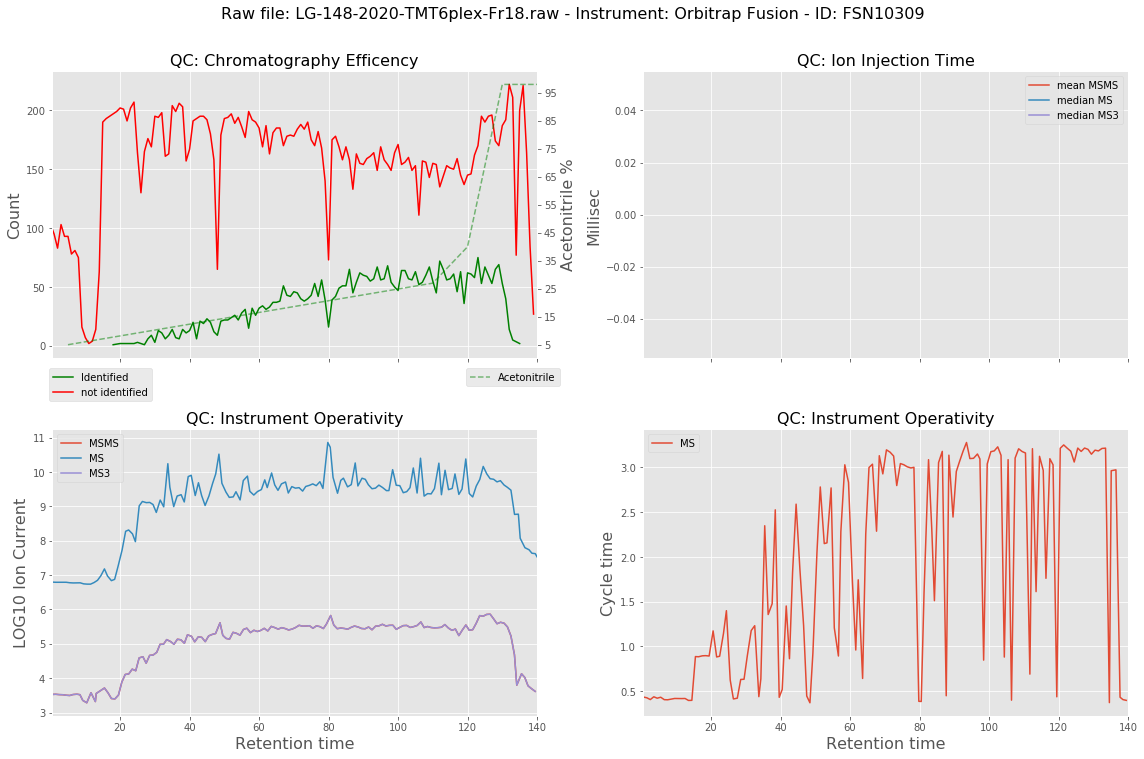

LG-148-2020-TMT6plex-Fr19.raw


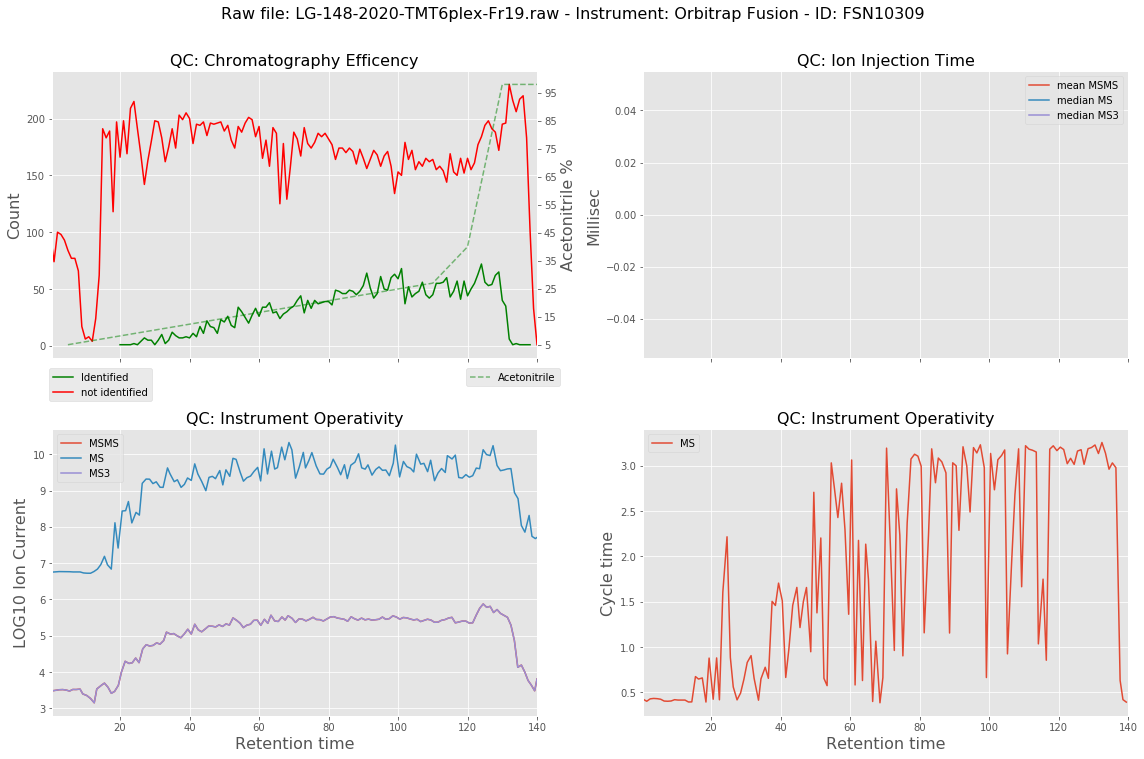

LG-148-2020-TMT6plex-Fr2.raw


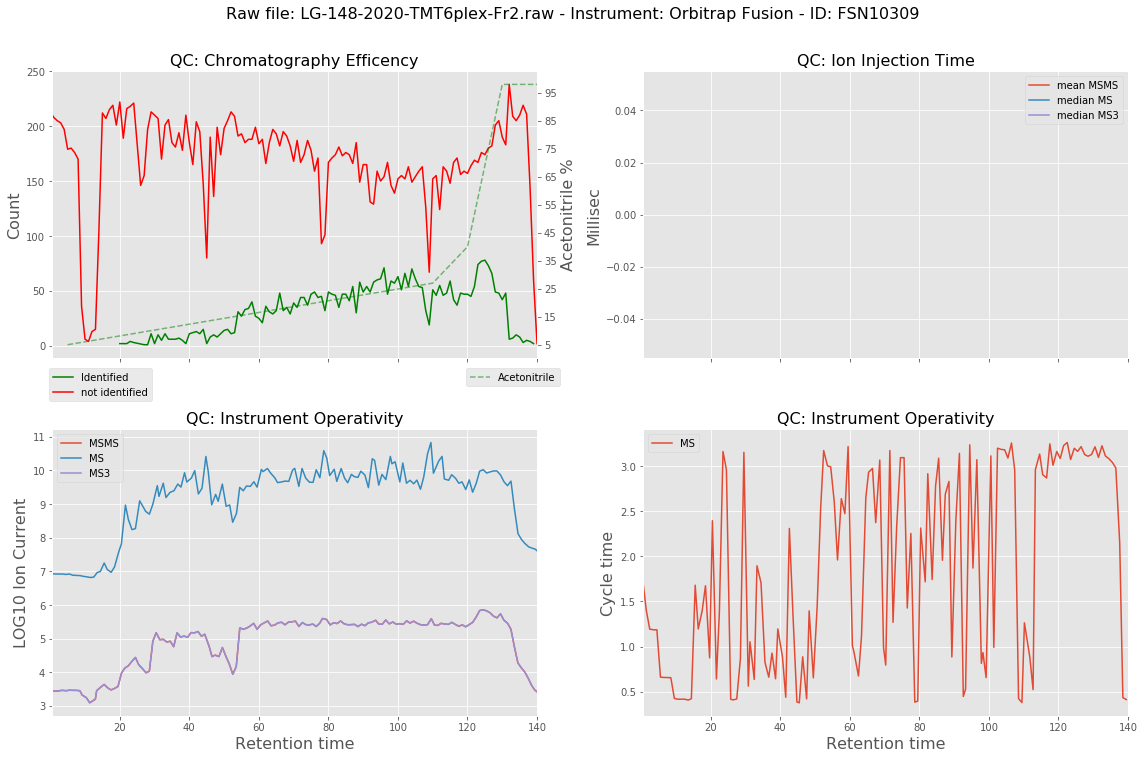

LG-148-2020-TMT6plex-Fr20.raw


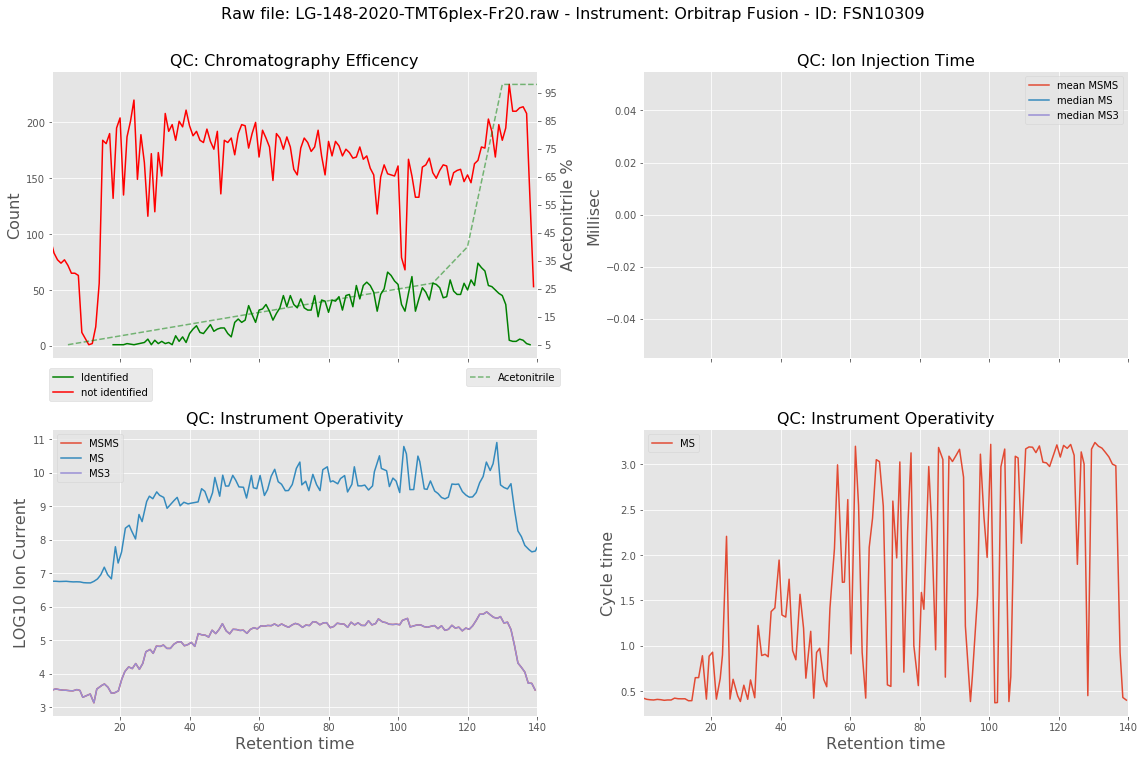

LG-148-2020-TMT6plex-Fr3.raw


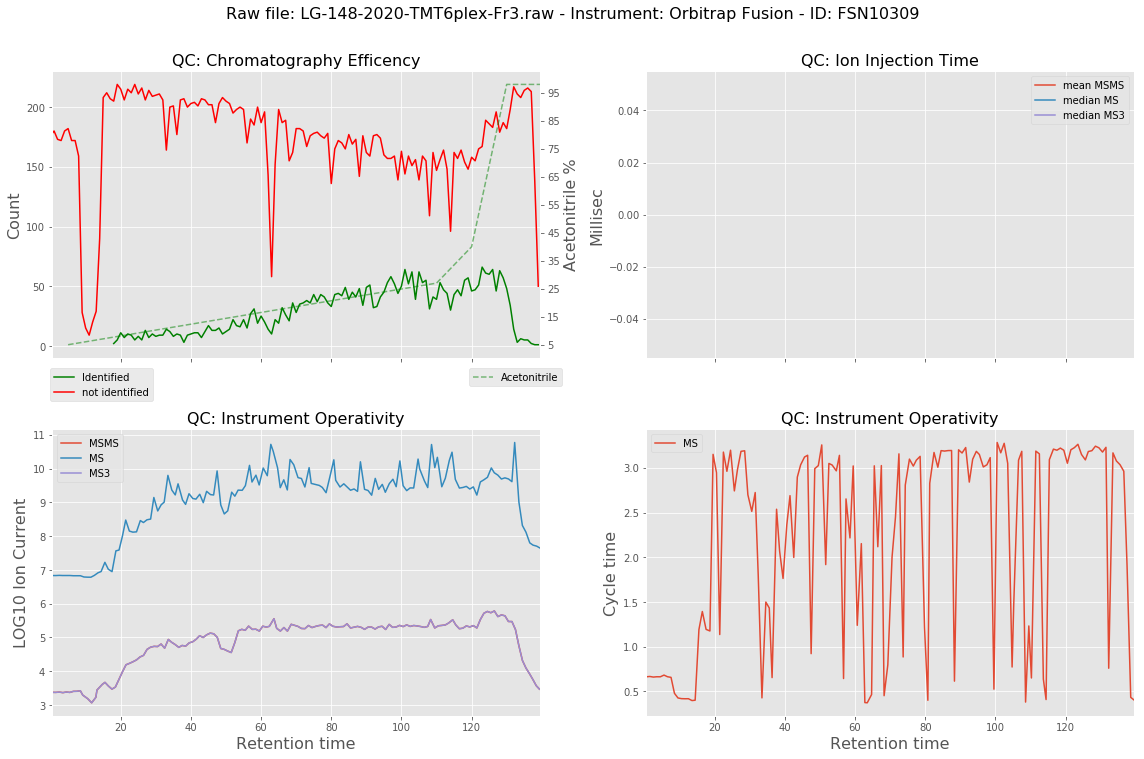

LG-148-2020-TMT6plex-Fr4.raw


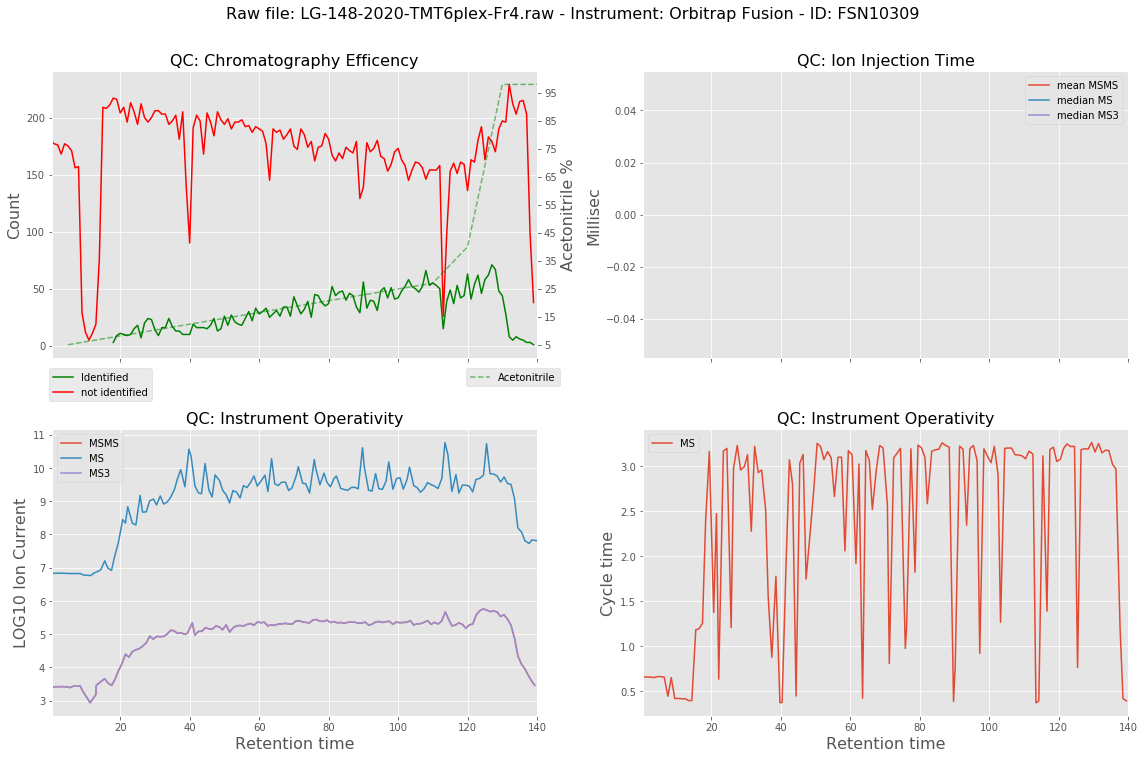

LG-148-2020-TMT6plex-Fr5.raw


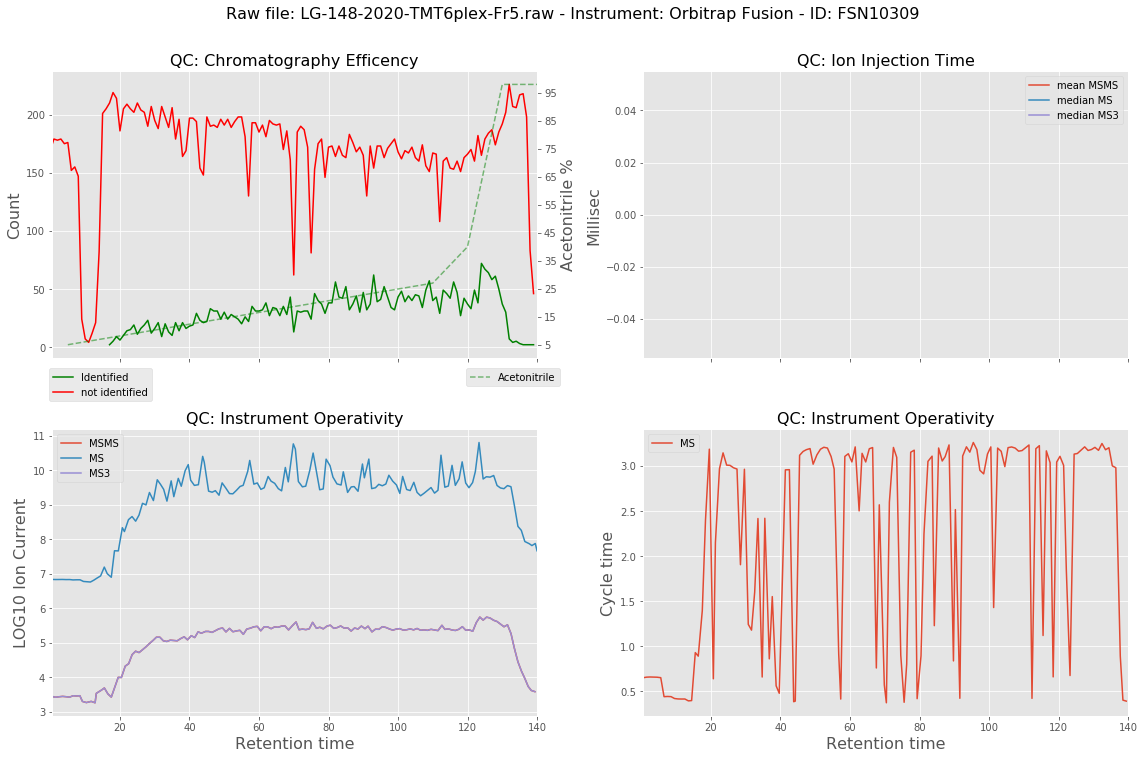

LG-148-2020-TMT6plex-Fr6.raw


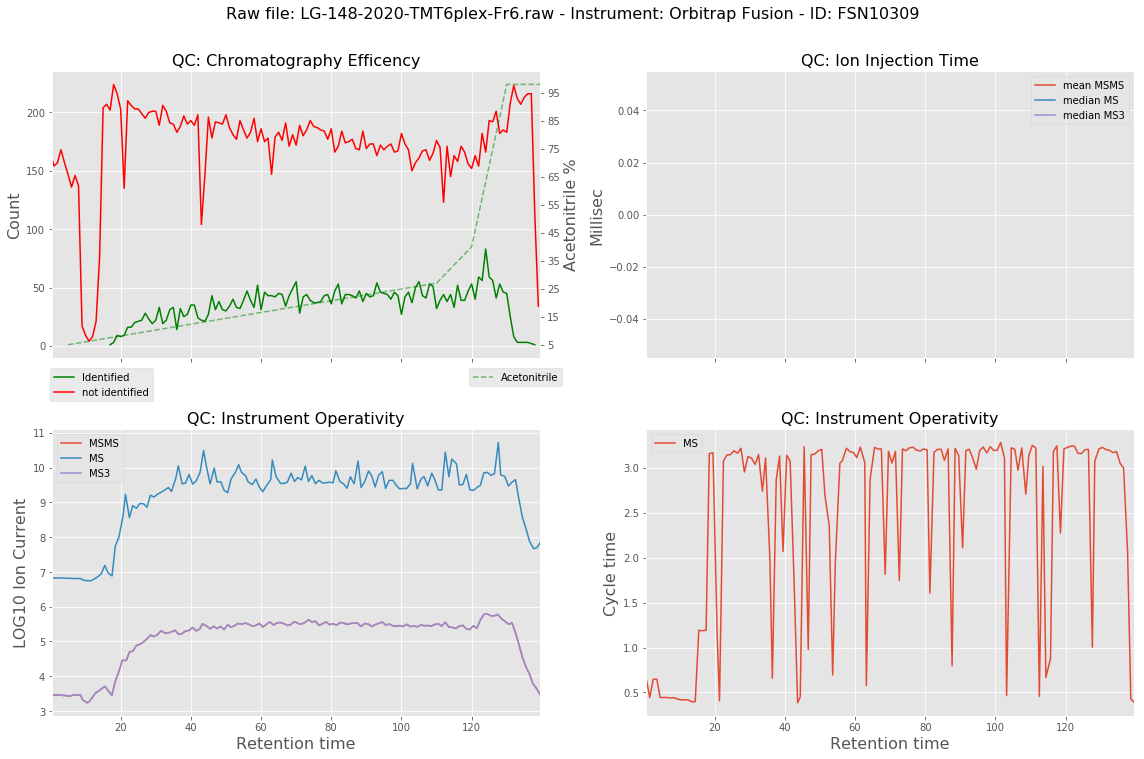

LG-148-2020-TMT6plex-Fr7.raw


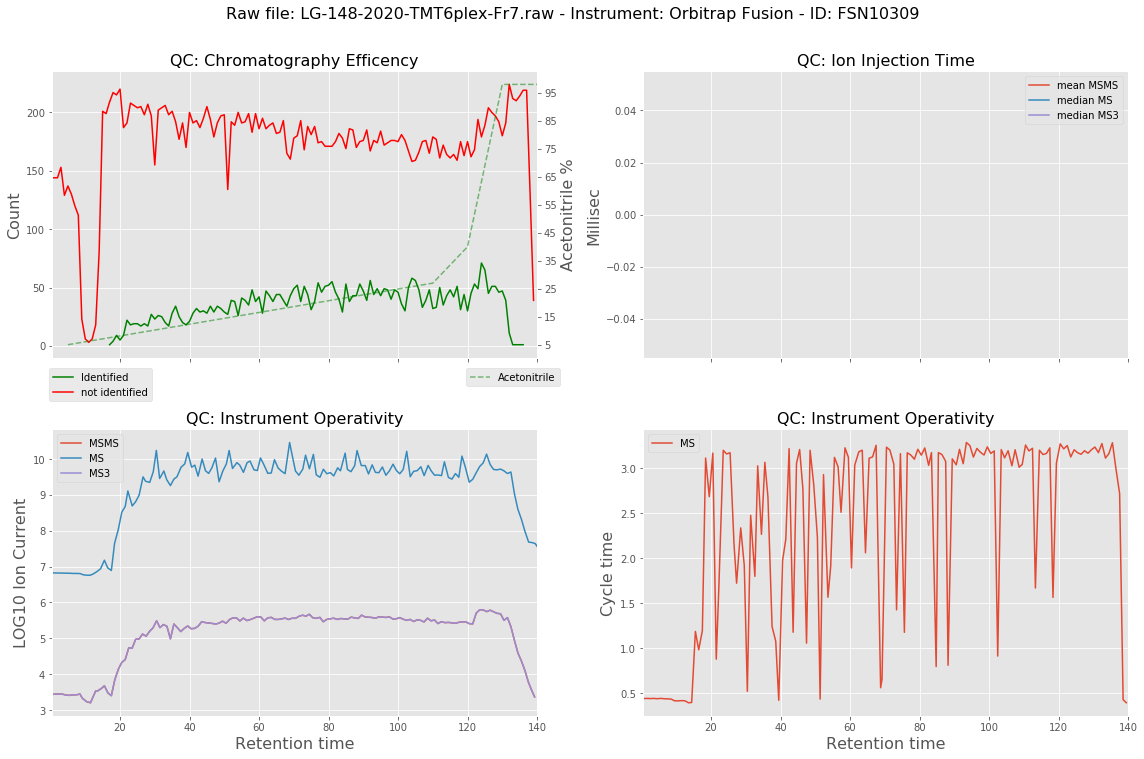

LG-148-2020-TMT6plex-Fr8.raw


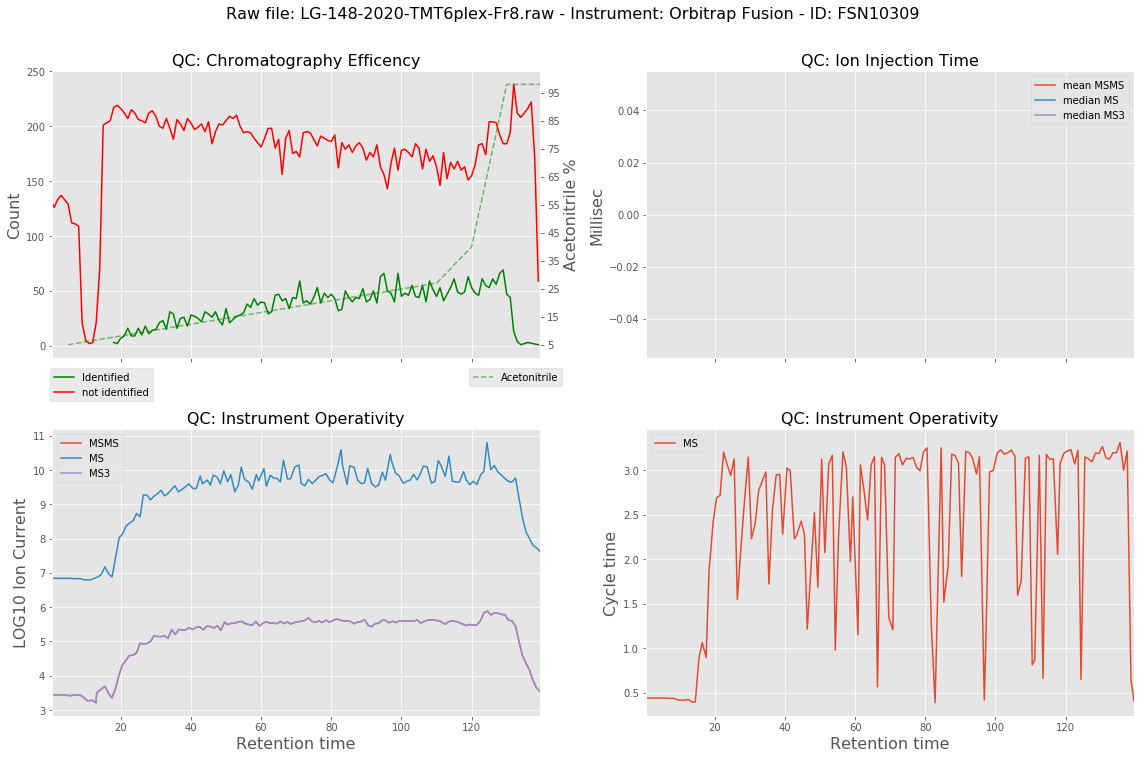

LG-148-2020-TMT6plex-Fr9.raw


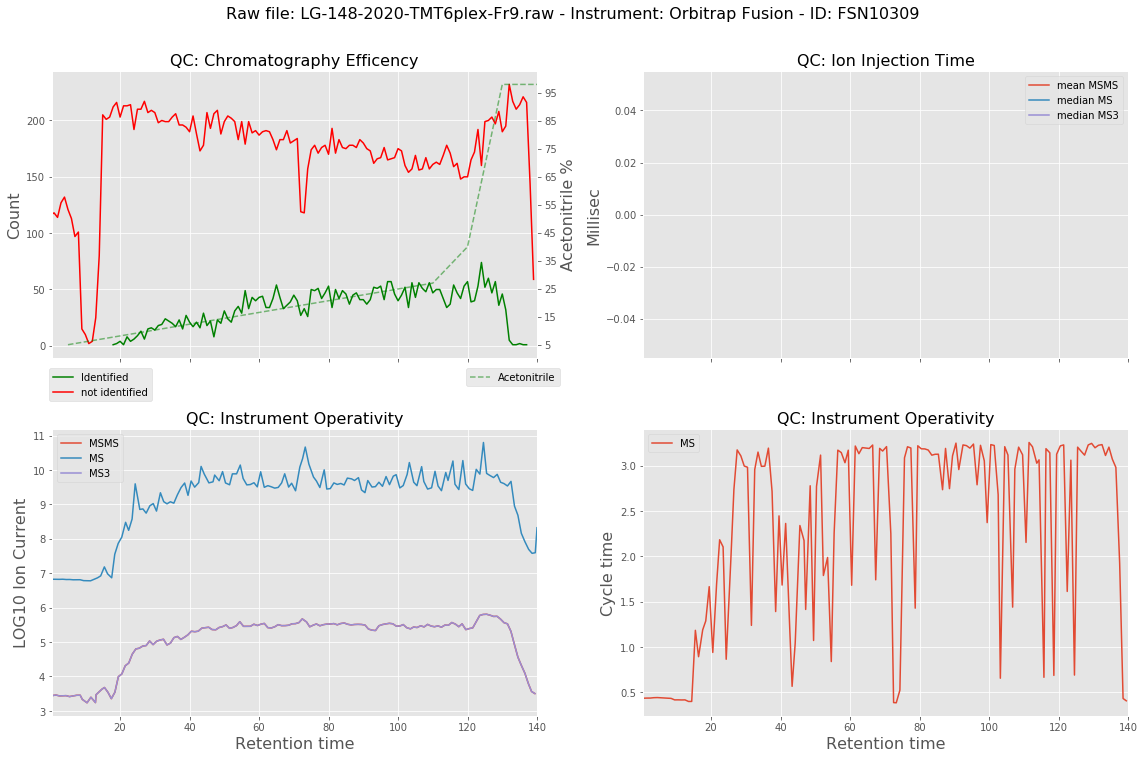

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import MSFileReader
import seaborn as sns

for raw_file_name in raw_list:
        print(raw_file_name)
        raw_file=MSFileReader.ThermoRawfile(os.path.join(RAW_FILE_PATH, raw_file_name))
        minutes, b_values = qc.extract_gradient(os.path.join(RAW_FILE_PATH, raw_file_name))
        #tempMSdf=msScans[msScans['Raw file']==raw_file_name.split('.')[0]]
        tempMSMSdf=msmsScans[msmsScans['Raw file']==raw_file_name.split('.')[0]]
        #print(tempMSMSdf.head())
        tempMSdf=msScans[msScans['Raw file']==raw_file_name.split('.')[0]]
        #tempMSMSMSdf = msmsmsScans[msmsmsScans['Raw file']==raw_file_name.split('.')[0]]
        qc.plot_raw_file(tempMSdf, tempMSMSdf, tempMSMSdf, 
                         raw_file_name, gradient = (minutes, b_values))
        plt.tight_layout()
        
        title = 'Raw file: {rfn} - Instrument: {Inst} - ID: {ID}'.format(rfn=raw_file_name,
                                                                        Inst=raw_file.GetInstModel(),
                                                                        ID=raw_file.GetInstSerialNumber())
        plt.suptitle(title ,fontsize=16, y=1.05)
        plt.savefig(os.path.join(RAW_FILE_PATH, 'images', raw_file_name+'.png'))
        plt.show() 
        '''
        sns.jointplot(x='Retention time', y="median_MSMS_error_ppm", kind='hex',
              data=msms[msms['Raw file']==raw_file_name.split('.')[0]],
             height=10,ratio=5)
        plt.savefig(os.path.join(RAW_FILE_PATH, 'images', raw_file_name+'MSMS_error_ppm.png'))
        plt.show()        
        
        sns.jointplot(x='Retention time', y="median_MSMS_error_dalton", kind='hex',
              data=msms[msms['Raw file']==raw_file_name.split('.')[0]],
             height=10,ratio=5)
        plt.savefig(os.path.join(RAW_FILE_PATH, 'images', raw_file_name+'MSMS_error_da.png'))
        plt.show()          
        '''
        #break

In [18]:
msmsScans.head()

Raw file  Retention time  Ion injection time  Total ion current  \
0  JG_24hrs1         0.97638               100.0        7099.200195   
1  JG_24hrs1         4.15670               100.0        7348.399902   
2  JG_24hrs1         7.43520               100.0        9539.599609   
3  JG_24hrs1        13.03900               100.0       12034.000000   
4  JG_24hrs1        13.06900               100.0       24490.000000   

  Identified                     Sequence  Charge  RT_round  RT_bin_qcut  
0          -                   KLSLLKVGTK       0         0          1.0  
1          -                   GFPGDAEGAM       0         4          1.0  
2          -                                    0         7          1.0  
3          -      NVVFSPYGVSSVLAMLQMTTAGK       5        13          1.0  
4          -  SGHSGSHHSHTTSQGRSDASHGQSGSR       5        13          1.0

In [23]:
msmsScans.head(),raw_list[0]

(    Raw file  Retention time  Ion injection time  Total ion current  \
 0  JG_24hrs1         0.97638               100.0        7099.200195   
 1  JG_24hrs1         4.15670               100.0        7348.399902   
 2  JG_24hrs1         7.43520               100.0        9539.599609   
 3  JG_24hrs1        13.03900               100.0       12034.000000   
 4  JG_24hrs1        13.06900               100.0       24490.000000   
 
   Identified                     Sequence  Charge  RT_round  RT_bin_qcut  
 0          -                   KLSLLKVGTK       0         0          1.0  
 1          -                   GFPGDAEGAM       0         4          1.0  
 2          -                                    0         7          1.0  
 3          -      NVVFSPYGVSSVLAMLQMTTAGK       5        13          1.0  
 4          -  SGHSGSHHSHTTSQGRSDASHGQSGSR       5        13          1.0  ,
 'JG_24hrs1.raw')

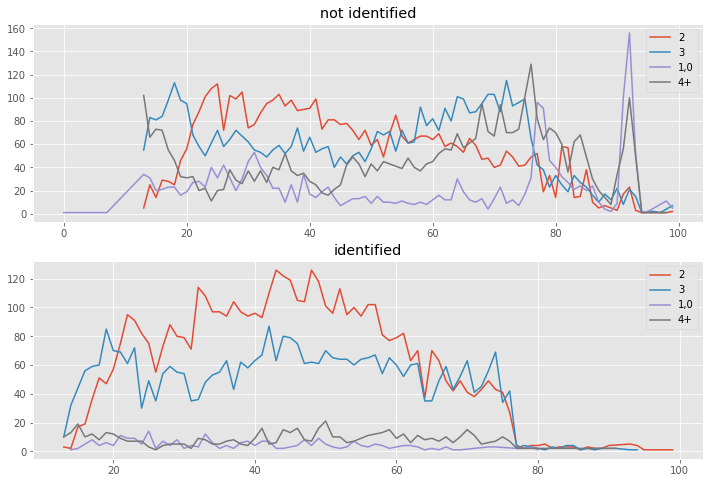

In [24]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(12,8),ncols=1,nrows=2)
temp = msmsScans[(msmsScans['Identified']=='-') & 
                 (msmsScans['Raw file']==raw_list[0].split('.')[0])]
for charge in range(2,4):
    temp_ = temp[temp['Charge']==charge]
    temp_ = temp_.groupby('RT_round')['Retention time'].size()
    ax[0].plot(temp_.index.values, temp_.values,'-', label=charge)
   

temp_ = temp[temp['Charge']<=1]
temp_ = temp_.groupby('RT_round')['Retention time'].size()
ax[0].plot(temp_.index.values, temp_.values,'-', label='1,0')

temp_ = temp[temp['Charge']>=4]
temp_ = temp_.groupby('RT_round')['Retention time'].size()
ax[0].plot(temp_.index.values, temp_.values,'-', label='4+')

ax[0].set_title('not identified')
ax[0].legend()

temp = msmsScans[(msmsScans['Identified']=='+') & 
                 (msmsScans['Raw file']==raw_list[0].split('.')[0]) ]
for charge in range(2,4):
    temp_ = temp[temp['Charge']==charge]
    temp_ = temp_.groupby('RT_round')['Retention time'].size()
    ax[1].plot(temp_.index.values, temp_.values,'-', label=charge)
    temp_ = temp[temp['Charge']==charge]

temp_ = temp[temp['Charge']<=1]
temp_ = temp_.groupby('RT_round')['Retention time'].size()
ax[1].plot(temp_.index.values, temp_.values,'-', label='1,0')

temp_ = temp[temp['Charge']>=4]
temp_ = temp_.groupby('RT_round')['Retention time'].size()
ax[1].plot(temp_.index.values, temp_.values,'-', label='4+')

ax[1].set_title('identified')
ax[1].legend()
plt.show()

In [25]:
df_summary.loc[df_summary.norm_retention_spread.sort_values().tail().index.values][['Raw file','norm_retention_spread']]

Raw file  norm_retention_spread
8   JG_CTRL3               0.903149
3  JG_48hrs1               0.910619
0  JG_24hrs1               0.910767
2  JG_24hrs3               0.912309
9      Total                    NaN

In [26]:
df_summary.loc[df_summary.norm_retention_spread.sort_values().head().index.values][['Raw file','norm_retention_spread']]

Raw file  norm_retention_spread
5  JG_48hrs3               0.889369
1  JG_24hrs2               0.897215
7   JG_CTRL2               0.898525
6   JG_CTRL1               0.898730
4  JG_48hrs2               0.899600

In [27]:
infile = os.path.join(TXT_PATH,'ms3Scans.txt')
infile = pd.read_csv(infile,sep='\t')
infile.head()

EmptyDataError: No columns to parse from file

In [52]:
infile.describe()

Scan number  Retention time  Ion injection time  Total ion current
count  3.100391e+07    3.100391e+07        5.982516e+06       3.100391e+07
mean   6.336763e+04    1.336692e+02        1.278913e+02       1.942007e+06
std    3.707307e+04    6.459373e+01        1.032622e+02       1.095132e+07
min    4.000000e+00    9.487000e-03        6.800000e-02       5.555700e+03
25%    3.248500e+04    7.964500e+01        4.316800e+01       1.766300e+05
50%    6.089000e+04    1.319300e+02        8.731700e+01       5.606600e+05
75%    9.090300e+04    1.866300e+02        2.115000e+02       1.566200e+06
max    1.680000e+05    2.650400e+02        3.000000e+02       7.168800e+09

In [48]:
#rawfile = MSFileReader("myfile.raw")
from tqdm import tqdm_notebook
from pymsfilereader import MSFileReader
#rawfile = MSFileReader("myfile.raw")
#RawReader.py
rawfile=MSFileReader.MSFileReader(os.path.join(RAW_FILE_PATH, raw_file_name))
with open('test.tsv', 'wt') as f:
    print('\t'.join(map(str, ('scan_number',
                                'RetentionTime',
                                'scan_number',
                                'GetFilterForScanNum(i)',
                                'GetMSOrderForScanNum(i)',
                                'GetNumberOfMSOrdersFromScanNum(i)',
                                'GetScanTypeForScanNum(i)',
                                'GetDetectorTypeForScanNum(i)',
                                'GetMassAnalyzerTypeForScanNum(i)',
                                'GetActivationTypeForScanNum(i,MSOrder=2)',
                                'IsProfileScanForScanNum(i)',
                                'IsCentroidScanForScanNum(i)',
                                'GetIsolationWidthForScanNum(i,MSOrder=1)',
                                'GetCollisionEnergyForScanNum(i,MSOrder=1)',
                                'GetPrecursorInfoFromScanNum(i)',
                                'GetMassCalibrationValueFromScanNum(i,massCalibrationIndex=0)',
                                'GetScanEventForScanNum(i)',
                                'GetSegmentAndEventForScanNum(i)',
                                'GetCycleNumberFromScanNumber(i)',
                                'GetAValueFromScanNum(i)',
                                'GetBValueFromScanNum(i)',
                                'GetKValueFromScanNum(i)',
                                'GetRValueFromScanNum(i)',
                                'GetVValueFromScanNum(i)',
                                'GetMSXMultiplexValueFromScanNum(i)',
                                'GetCompoundNameFromScanNum(i)',
                                'GetNumberOfMassRangesFromScanNum(i)',
                                'GetMassRangeFromScanNum(i,0)',
                                'GetMassRangeFromScanNum(i,1)',
                                'GetNumberOfSourceFragmentsFromScanNum(i)',
                                'GetSourceFragmentValueFromScanNum(i,0)',
                                'GetNumberOfSourceFragmentationMassRangesFromScanNum(i)'
                                ))), file=f)

    for i in tqdm_notebook(range(rawfile.FirstSpectrumNumber, rawfile.LastSpectrumNumber + 1)):
        print('\t'.join(map(str, (i,
                                    rawfile.RTFromScanNum(i),
                                    rawfile.ScanNumFromRT(rawfile.RTFromScanNum(i)),
                                    rawfile.GetFilterForScanNum(i),
                                    rawfile.GetMSOrderForScanNum(i),
                                    rawfile.GetNumberOfMSOrdersFromScanNum(i),
                                    rawfile.GetScanTypeForScanNum(i),
                                    rawfile.GetDetectorTypeForScanNum(i),
                                    rawfile.GetMassAnalyzerTypeForScanNum(i),
                                    rawfile.GetActivationTypeForScanNum(i, MSOrder=2),
                                    rawfile.IsProfileScanForScanNum(i),
                                    rawfile.IsCentroidScanForScanNum(i),
                                    'none',
                                    #rawfile.GetIsolationWidthForScanNum(i, MSOrder=1),
                                   'none',
                                    #rawfile.GetCollisionEnergyForScanNum(i, MSOrder=1),
                                    rawfile.GetPrecursorInfoFromScanNum(i),
                                    rawfile.GetMassCalibrationValueFromScanNum(i, massCalibrationIndex=0),
                                    rawfile.GetScanEventForScanNum(i),
                                    rawfile.GetSegmentAndEventForScanNum(i),
                                    rawfile.GetCycleNumberFromScanNumber(i),
                                    rawfile.GetAValueFromScanNum(i),
                                    rawfile.GetBValueFromScanNum(i),
                                    rawfile.GetKValueFromScanNum(i),
                                    rawfile.GetRValueFromScanNum(i),
                                    rawfile.GetVValueFromScanNum(i),
                                    rawfile.GetMSXMultiplexValueFromScanNum(i),
                                    rawfile.GetCompoundNameFromScanNum(i),
                                    rawfile.GetNumberOfMassRangesFromScanNum(i),
                                    rawfile.GetMassRangeFromScanNum(i, 0),
                                    rawfile.GetMassRangeFromScanNum(i, 1),
                                    rawfile.GetNumberOfSourceFragmentsFromScanNum(i),
                                    rawfile.GetSourceFragmentValueFromScanNum(i, 0),
                                    rawfile.GetNumberOfSourceFragmentationMassRangesFromScanNum(i)
                                    ))), file=f)

rawfile.Close()

E:\miniconda3\envs\myEnv\lib\site-packages\ipykernel_launcher.py:42: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
